## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

# Import necessary libraries

In [2]:
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.

In [4]:
X,y = make_classification(n_samples=10000, n_features=8, n_informative=5, class_sep=2, random_state=42)
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7
0,-0.475055,1.455643,-1.571111,-2.233576,-2.272510,-0.478333,0.012107,-1.616344
1,1.578351,4.611229,-0.527495,-1.868875,2.921311,-1.783386,3.431662,-0.178611
2,-2.677604,0.619333,-0.260753,1.768409,1.511900,-1.552257,1.182059,1.810524
3,0.379412,0.879235,-0.787970,-0.457057,3.388700,1.787840,4.294263,0.427934
4,-3.645689,3.371521,-2.061152,-1.314058,-0.169329,-2.487230,2.144342,-0.733770


# Check duplicate values and missing data.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
dtypes: float64(8)
memory usage: 625.1 KB


In [6]:
df.isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

In [7]:
df.describe()

,0,1,2,3,4,5,6,7
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,-1.004918,0.982548,0.003020,1.071892,0.995967,-1.869138,-0.001747,0.994744
std,2.125161,2.236374,1.016612,2.571314,2.161592,2.587044,2.446634,2.266276
min,-7.361942,-6.334871,-3.531879,-6.507147,-6.124101,-10.552410,-8.263252,-6.274545
25%,-2.575438,-0.418504,-0.673464,-1.196634,-0.507065,-3.750591,-1.984409,-0.594088
50%,-1.448219,1.414705,0.013764,1.182811,1.478394,-1.769049,0.215688,1.373192
75%,0.666344,2.548942,0.680873,3.296581,2.529939,0.072616,1.985890,2.617999
max,6.445003,7.784181,3.443926,8.484377,7.824402,5.853682,6.944183,7.815690


# Visualize data for each feature (pairplot,distplot).

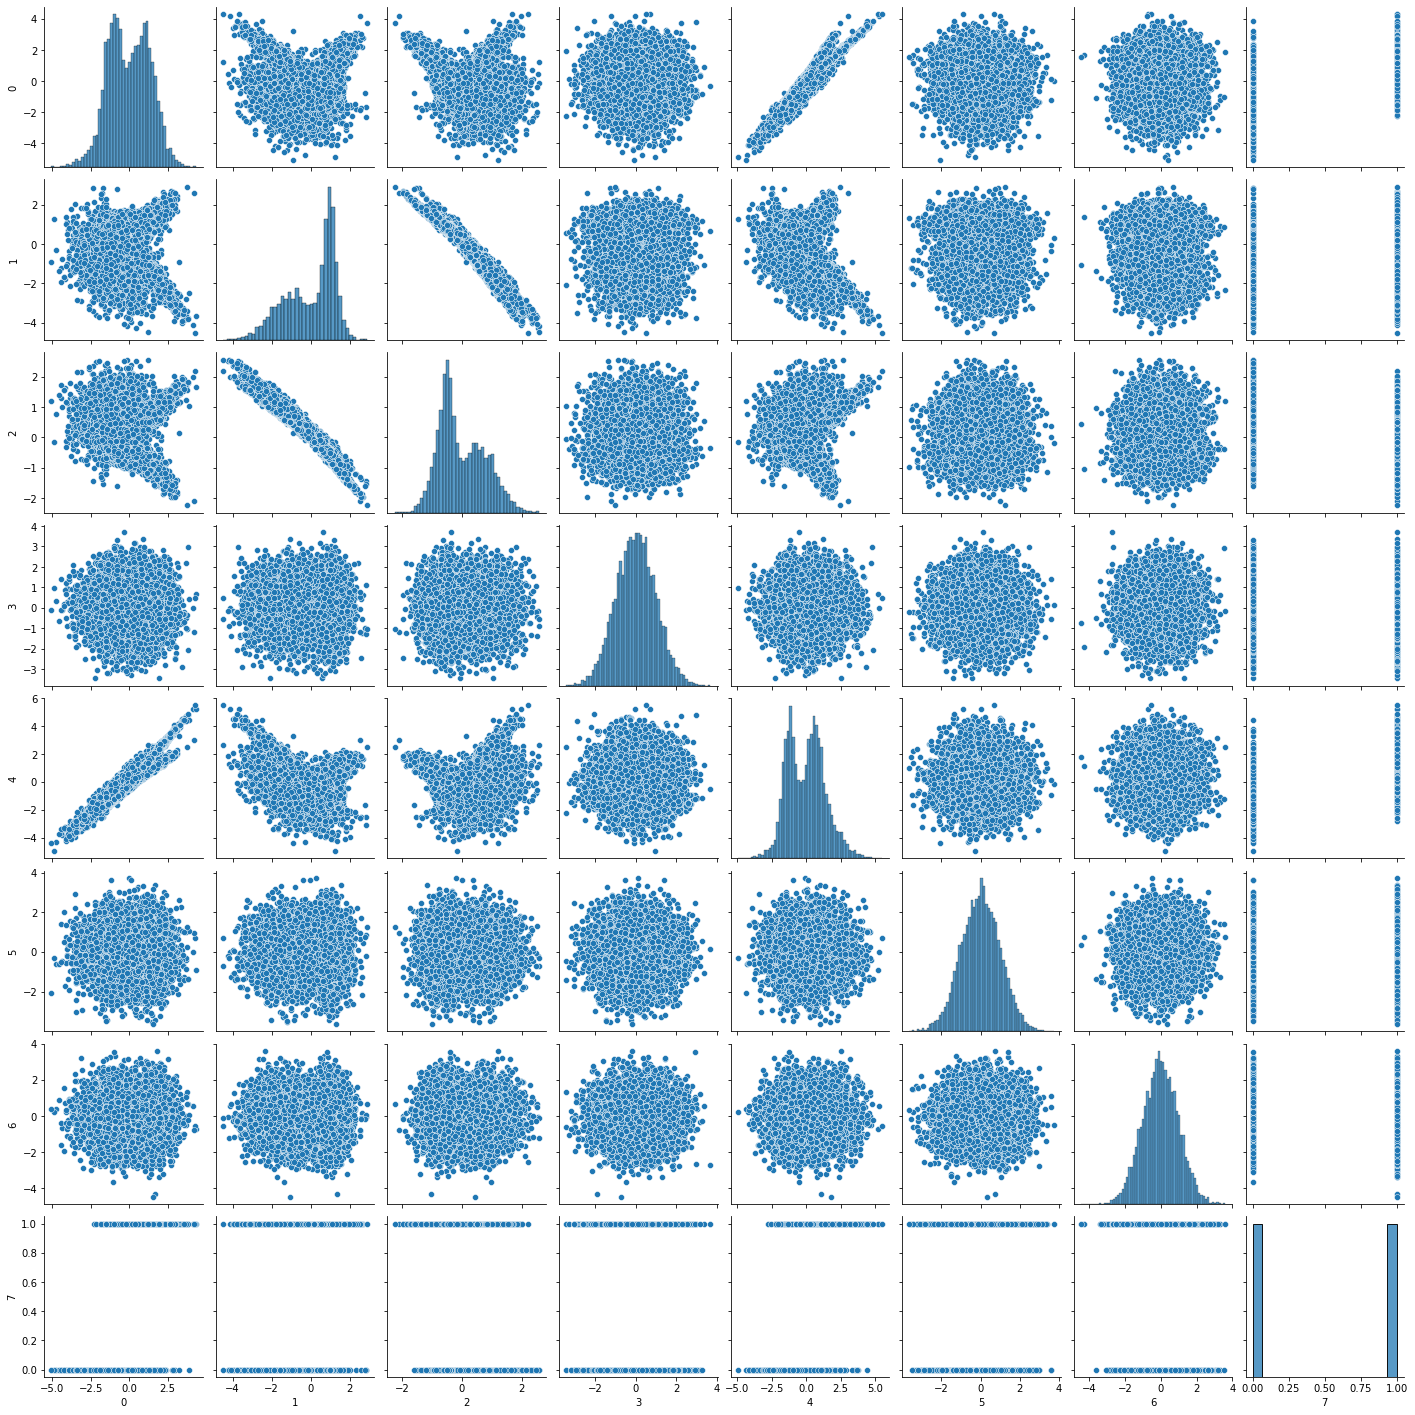

In [9]:
sns.pairplot(df)

C:\Users\orcun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

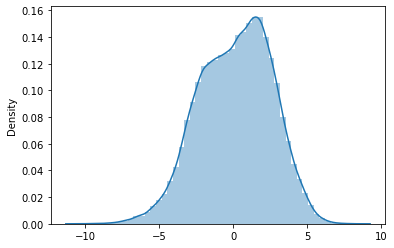

In [8]:
sns.distplot(df)

# Draw correlation matrix.

In [9]:
df.corr()

,0,1,2,3,4,5,6,7
0,1.000000,0.235306,0.019813,-0.705908,0.310024,0.635628,0.545522,-0.636540
1,0.235306,1.000000,-0.001988,-0.618075,-0.180396,-0.347091,0.469165,-0.129568
2,0.019813,-0.001988,1.000000,-0.010795,0.027022,0.023192,0.020194,-0.018107
3,-0.705908,-0.618075,-0.010795,1.000000,0.086099,-0.439463,-0.672497,0.758458
4,0.310024,-0.180396,0.027022,0.086099,1.000000,0.461343,0.465025,-0.176576
5,0.635628,-0.347091,0.023192,-0.439463,0.461343,1.000000,0.547131,-0.647011
6,0.545522,0.469165,0.020194,-0.672497,0.465025,0.547131,1.000000,-0.388518
7,-0.636540,-0.129568,-0.018107,0.758458,-0.176576,-0.647011,-0.388518,1.000000


# Handle outliers (you can use IsolationForest, Z-score, IQR)

In [10]:
z = np.abs(stats.zscore(df))
z
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

58

# Split dataset into train and test set

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Import Decision Tree, define different hyperparamters and tune the algorithm.

In [12]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=9, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9905714285714285
Accuracy of test: 0.9806666666666667


# Visualize feature importances

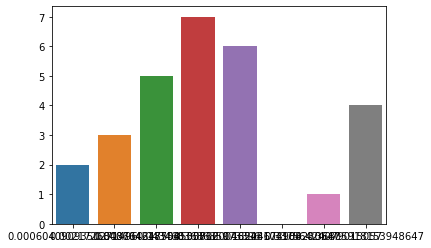

In [13]:
plt.figure()
importance = clf.feature_importances_
sns.barplot(x=importance, y=df.columns)
plt.show()

# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1468
           1       0.98      0.98      0.98      1532

    accuracy                           0.98      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.98      0.98      0.98      3000

Precision = 0.9806136075493572
Recall = 0.9807290073348938
Accuracy = 0.9806666666666667
F1 Score = 0.980660400636473


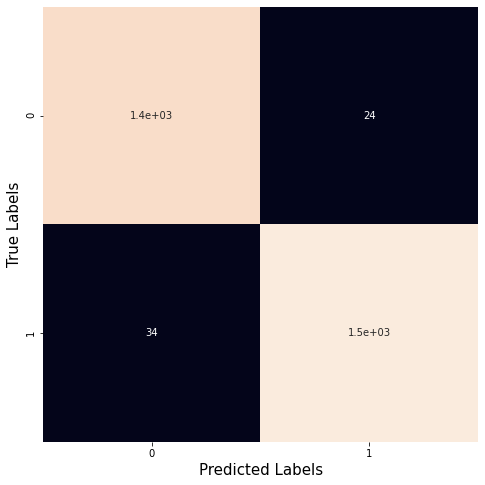

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()


# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.

In [18]:
import xgboost as xgb

dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

param = {'max_depth':7, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':8}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

preds = model.predict(dmatrix_test)

best_preds = np.asarray([np.argmax(line) for line in preds])

[14:29:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


# Visualize feature importances.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

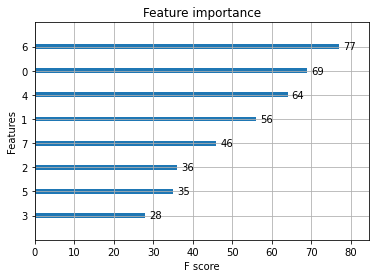

In [19]:
xgb.plot_importance(model)

# Create confusion matrix and calculate accuracy, recall, precision and f1 score.

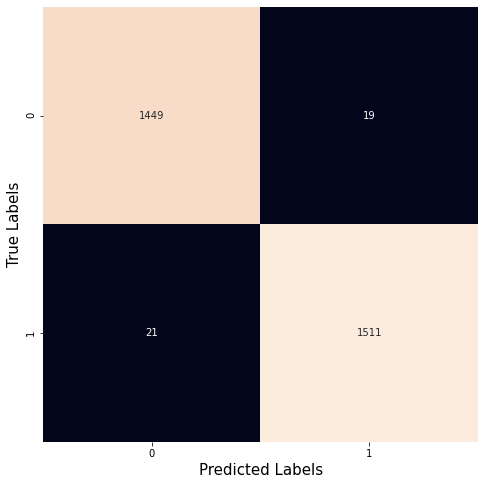

Precision = 0.9866479925303455
Recall = 0.9866748244534401
Accuracy = 0.9866666666666667


In [22]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False, fmt='g')
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

# Evaluate your result and select best performing algorithm for our case.

XGBoost has higher Precision, Accuracy and Recall results. It can be seen that XGBoost is more accurate, comparing confusion matrices. So, XGBoost is better.